LOAD AND EXPLORE DATASET

In [65]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
#loading dataset
df = pd.read_csv(r"C:\Users\91628\OneDrive\Desktop\EXPOSYS\Diabetes_Prediction_EDL\dataset\diabetes.csv")

In [67]:
#information about dataset
print("shape of dataset:", df.shape)

shape of dataset: (768, 9)


In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check for Nulls & Describe

In [70]:
#check missing values
print("missing values in dataset:\n", df.isnull().sum())

missing values in dataset:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


VISUALISE FEATURES

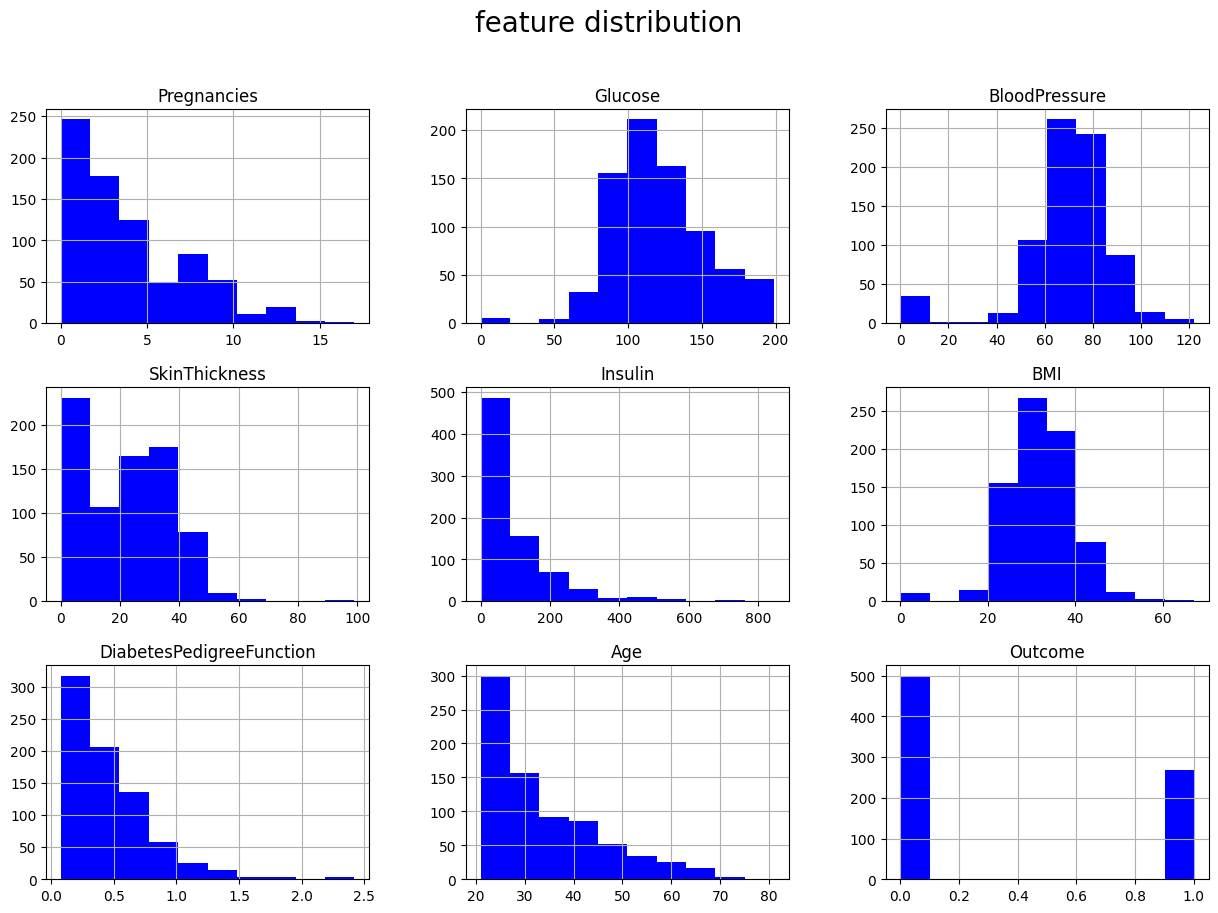

In [71]:
#plot histograms
df.hist(bins = 10 , figsize= (15, 10) , color = 'blue')
plt.suptitle("feature distribution", fontsize=20)
plt.show()

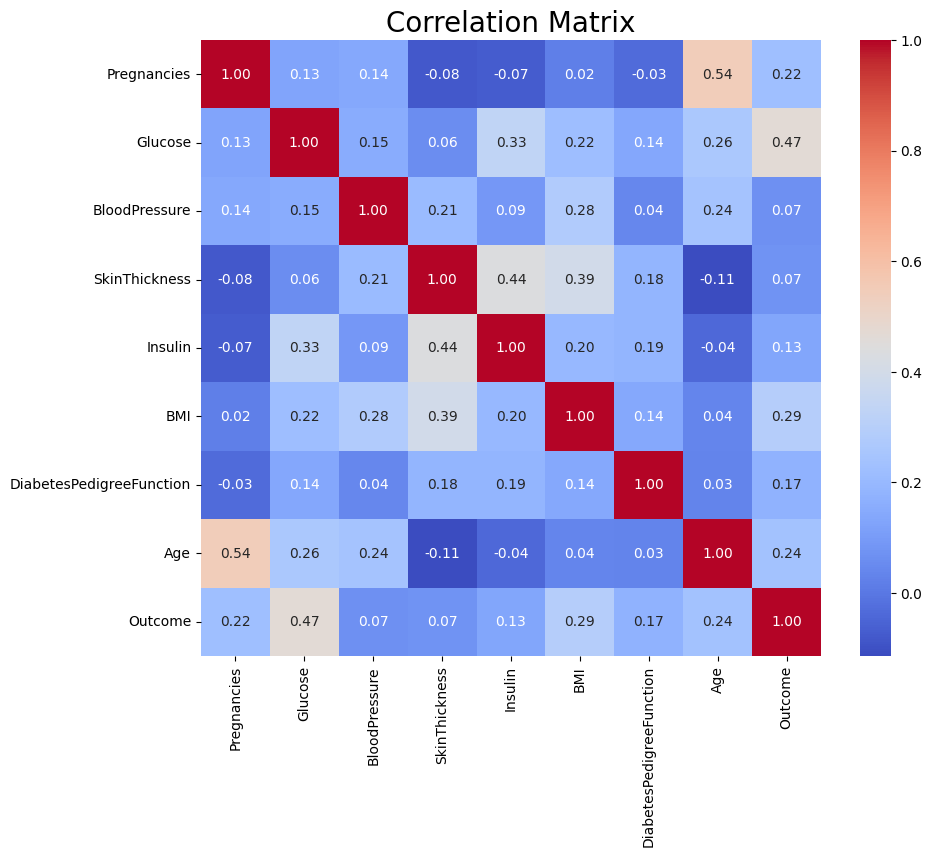

In [72]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Data cleaning and pre-processing

In [73]:
#these columns following can never have 0 value 
columns_with_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
#replace 0 with NaN in these columns
df[columns_with_zeroes] = df[columns_with_zeroes].replace(0, np.nan)
#how many null values are there in the dataset
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [74]:
#fill the missing values with median of the column
df.fillna(df.median(),inplace = True)
#now missing values checking
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Feature-Target Split

In [75]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("feature set shape:", x.shape)
print("target set shape:", y.shape)

feature set shape: (768, 8)
target set shape: (768,)


Train-Test split

In [76]:
from sklearn.model_selection import train_test_split
#split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])


Training samples: 614
Testing samples: 154


Logistic Regression

🔹 Logistic Regression Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



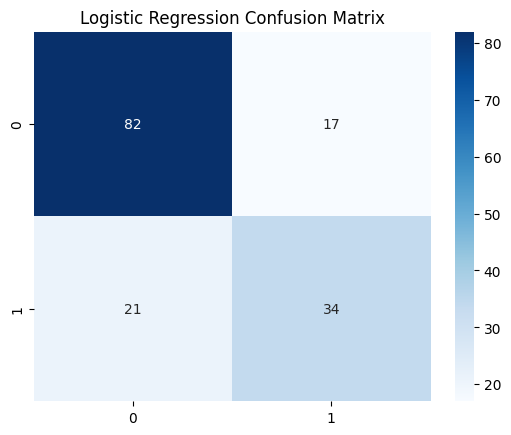

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#initialize the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

y_pred_log = logreg.predict(x_test)

#evaluate the model
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [78]:
import pickle

# Save the model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(logreg, f)


Random Forest Classifier

In [79]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(x_train, y_train)
# y_pred_rf = rf.predict(x_test)
# #evaluate the model
# print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
# sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
# plt.title("Random Forest Confusion Matrix")
# plt.show()

XGBoost Classifier

In [80]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb.fit(x_train, y_train)

# y_pred_xgb = xgb.predict(x_test)

# print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
# sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
# plt.title("XGBoost Confusion Matrix")
# plt.show()



In [81]:
# print("🔍 Model Comparison:")

# print(f"🔹 Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
# print(f"🔹 Random Forest Accuracy:       {accuracy_score(y_test, y_pred_rf):.4f}")
# print(f"🔹 XGBoost Accuracy:             {accuracy_score(y_test, y_pred_xgb):.4f}")
